In [6]:
from pandas import read_csv
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
df = read_csv('synthetic.csv')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import IsolationForest
from pyod.models.knn import KNN 
import pyod
from pyod.utils.data import evaluate_print
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.font_manager
import numpy as np
from pyod.models.abod import ABOD
from pyod.models.knn import KNN
from pyod.utils.data import generate_data, get_outliers_inliers
import seaborn as sns 
from sklearn.neighbors import NearestNeighbors

In [7]:
df.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'outlier'], dtype='object')

In [8]:
df.outlier= pd.Categorical(df.outlier).codes

In [4]:
print(df.groupby('outlier')['1'].count())

outlier
no     900
yes    100
Name: 1, dtype: int64


In [31]:
data=df.loc[:, df.columns != 'outlier'].values

In [32]:
# instantiate model
nbrs = NearestNeighbors(n_neighbors = 3)
# fit model
nbrs.fit(data)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                 radius=1.0)

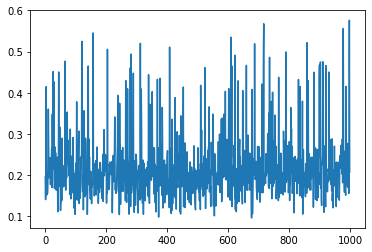

In [33]:
# distances and indexes of k-neaighbors from model outputs
distances, indexes = nbrs.kneighbors(data)
# plot mean of k-distances of each observation
plt.plot(distances.mean(axis =1))

In [34]:
outlier_index = np.where(distances.mean(axis = 1) >0.3)
outlier_values = df.iloc[outlier_index]
outlier_values

,0,1,2,3,4,5,6,7,8,9,outlier
3,0.817491,0.647528,0.046214,0.487270,0.053872,0.817499,0.390589,0.394750,0.736854,0.442689,1
10,0.684177,0.997182,0.239274,0.794946,0.041115,0.304813,0.423234,0.023102,0.407379,0.787388,1
23,0.064359,0.129525,0.183766,0.860040,0.254505,0.440920,0.089274,0.941902,0.904978,0.215016,1
25,0.122225,0.246771,0.374035,0.387213,0.034881,0.102960,0.259756,0.020360,0.472351,0.195330,0
26,0.318134,0.984550,0.858386,0.872008,0.950152,0.298551,0.275030,0.207604,0.855490,0.191021,1
...,...,...,...,...,...,...,...,...,...,...,...
931,0.882822,0.517934,0.615919,0.543449,0.662865,0.755802,0.872439,0.006749,0.263889,0.135646,1
977,0.214550,0.567478,0.559684,0.535956,0.904327,0.005931,0.156257,0.515366,0.566043,0.498918,1
978,0.178173,0.304310,0.028749,0.800844,0.161153,0.874650,0.984053,0.205747,0.029727,0.842088,1
987,0.505864,0.231274,0.268309,0.795418,0.254847,0.515858,0.781295,0.111659,0.519996,0.723326,1


In [35]:
print(outlier_values.groupby('outlier')['1'].count())

outlier
0    10
1    87
Name: 1, dtype: int64


In [36]:
plt.rcParams["figure.figsize"] = (10,8)

Text(0.5, 1.0, 'Outlier Detection Using KNN ')

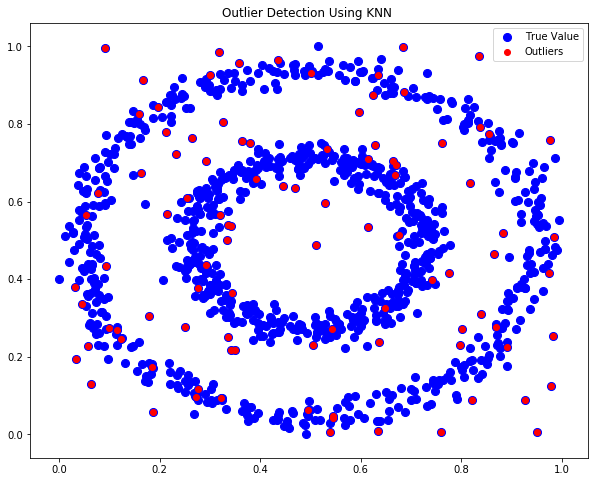

In [37]:
# plot data
plt.scatter(df["0"], df["1"], color = "b", s = 65)
# plot outlier values
plt.scatter(outlier_values["0"], outlier_values["1"], color = "r")
plt.legend( ["True Value", "Outliers"])
plt.title("Outlier Detection Using KNN ")

In [38]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df.loc[:, df.columns != 'outlier']))
print(z)

[[0.21560572 1.79387548 0.1647912  ... 0.96277369 0.45712651 0.20224592]
 [0.54760765 1.80976906 0.73952422 ... 1.60244742 0.75713112 0.31218876]
 [0.26950224 0.75604504 0.36315805 ... 0.58677041 1.50228457 1.33870061]
 ...
 [0.80930041 0.1333541  0.85090891 ... 0.39883721 0.51874498 0.90290406]
 [1.28057518 1.33010335 0.80852009 ... 1.95083922 1.29377351 1.79398205]
 [0.74848791 0.1030849  0.26693322 ... 1.35614192 0.55348436 0.28388443]]


In [39]:
threshold = 2
print(np.where(z > 2))

(array([ 10,  23,  39,  65,  72,  92, 117, 120, 140, 141, 152, 152, 157,
       192, 282, 289, 312, 316, 339, 345, 346, 384, 408, 436, 436, 440,
       446, 455, 556, 586, 596, 602, 623, 633, 660, 679, 687, 711, 736,
       736, 746, 806, 808, 811, 811, 815, 815, 825, 831, 836, 844, 859,
       875, 903, 911, 931, 934, 941, 946, 964], dtype=int64), array([1, 7, 7, 9, 9, 7, 9, 7, 9, 8, 8, 9, 7, 7, 8, 9, 7, 9, 8, 9, 9, 9,
       9, 8, 9, 9, 7, 9, 9, 7, 9, 7, 7, 9, 7, 7, 1, 7, 7, 9, 7, 7, 7, 8,
       9, 7, 9, 9, 9, 8, 9, 9, 1, 8, 9, 7, 9, 7, 9, 9], dtype=int64))


In [40]:
outlier_values_Z = df.iloc[(z > 2)]

In [41]:
print(outlier_values_Z.groupby('outlier')['1'].count())

outlier
0    27
1    33
Name: 1, dtype: int64


Text(0.5, 1.0, 'Outlier Detection Using Z SCORE')

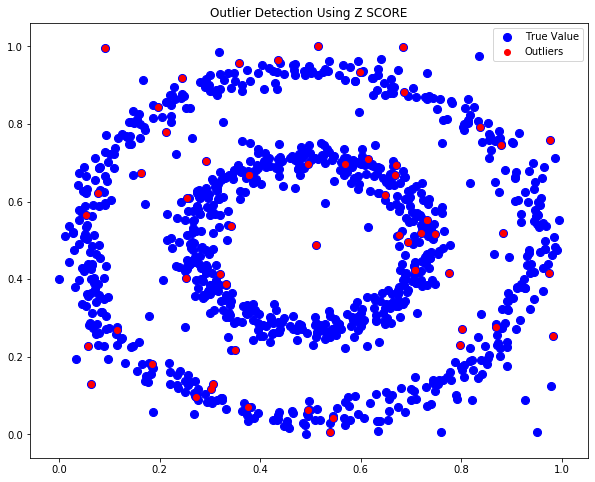

In [16]:
# plot data
plt.scatter(df["0"], df["1"], color = "b", s = 65)
# plot outlier values
plt.scatter(outlier_values_Z["0"], outlier_values_Z["1"], color = "r")
plt.legend( ["True Value", "Outliers"])
plt.title("Outlier Detection Using Z SCORE")

In [42]:
from sklearn.ensemble import IsolationForest
iso = IsolationForest(contamination=0.05)
yhat = iso.fit_predict(data)

In [43]:
mask = yhat != -1
df_filterd_if= pd.DataFrame(data[mask, :])


In [44]:
data2=df.values

In [45]:
mask = yhat == -1
outlier_values_if=pd.DataFrame(data2[mask, :])

In [46]:
outlier_values_if.columns=['0','1','2','3','4','5','6','7','8','9','outlier']

In [47]:
print(outlier_values_if.groupby('outlier')['1'].count())

outlier
0.0     9
1.0    41
Name: 1, dtype: int64


Text(0.5, 1.0, 'Outlier Detection Using ISOLATION FOREST')

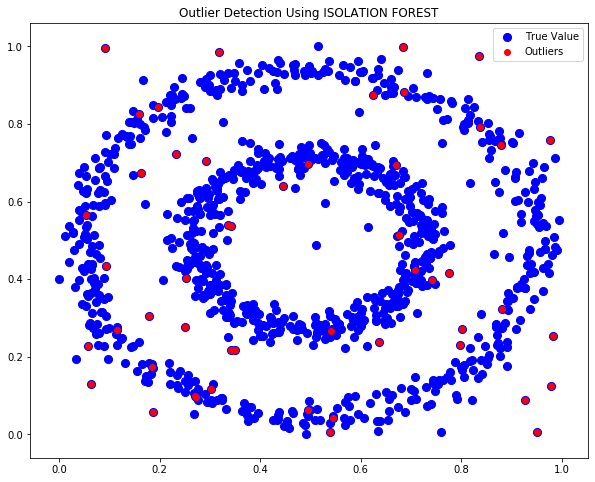

In [48]:
# plot data
plt.scatter(df["0"], df["1"], color = "b", s = 65)
# plot outlier values
plt.scatter(outlier_values_if["0"], outlier_values_if["1"], color = "r")
plt.legend( ["True Value", "Outliers"])
plt.title("Outlier Detection Using ISOLATION FOREST")

In [49]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

In [50]:
df_knn_filtered=df.drop(df.index[outlier_index])

In [71]:
X = df_knn_filtered.iloc[:,0:10]
Y = df_knn_filtered.iloc[:,10]

In [72]:
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [54]:
df_true=df_knn_filtered[df_knn_filtered.outlier==0]
df_outlier=df_knn_filtered[df_knn_filtered.outlier==1]

In [56]:
df_true_train,df_true_test=train_test_split(df_true,test_size=0.2,shuffle = False, stratify = None)
df_outlier_train,df_outlier_test=train_test_split(df_outlier,test_size=0.2,shuffle = False, stratify = None)

In [62]:
train=df_true_train.append(df_outlier_train).sample(frac=1).reset_index(drop=True)
test=df_true_test.append(df_outlier_test).sample(frac=1).reset_index(drop=True)

In [66]:
Xtrain = train.iloc[:,0:10]
Ytrain = train.iloc[:,10]

In [70]:
Xtest = test.iloc[:,0:10]
Ytest = test.iloc[:,10]

In [77]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(Xtrain)
Xtrain_scl=scaler.transform(Xtrain)

In [78]:
Xtest_scl=scaler.transform(Xtest)

In [82]:

model = XGBClassifier()
model.fit(Xtrain_scl, Ytrain)


[07:16:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

In [83]:
y_pred = model.predict(Xtest_scl)

In [84]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0], dtype=int8)

In [60]:
y_test=pd.DataFrame(y_pred)
# print(y_test.groupby('outlier')['1'].count())

In [62]:
len(y_test[y_test['outlier']=='yes'])

37

In [63]:
pred=pd.DataFrame()

In [67]:
pred['true']=y_test['outlier']
pred['predicted']=np.array(y_pred)

In [86]:
df_2nd_level=df_knn_filtered

In [88]:
df_2nd_level.outlier= pd.Categorical(df_2nd_level.outlier).codes

In [91]:
X = df_2nd_level.iloc[:,0:10]
Y = df_2nd_level.iloc[:,10]
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [92]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [93]:
param = {
    'max_depth': 3,  # the maximum depth of each tree
    'eta': 0.3,  # the training step for each iteration
    'silent': 1,  # logging mode - quiet
    'objective': 'multi:softprob',  # error evaluation for multiclass training
    'num_class': 3}  # the number of classes that exist in this datset
num_round = 20  # the number of training iterations

In [94]:
bst = xgb.train(param, dtrain, num_round)
preds = bst.predict(dtest)

[06:52:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[06:52:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [95]:
preds

array([[0.9957296 , 0.00246543, 0.0018049 ],
       [0.995635  , 0.00299323, 0.00137177],
       [0.9959966 , 0.00263119, 0.00137227],
       [0.9964504 , 0.00217669, 0.00137289],
       [0.99692446, 0.00164075, 0.00143475],
       [0.9939129 , 0.00396442, 0.00212263],
       [0.9940211 , 0.00366483, 0.00231407],
       [0.9966928 , 0.00187286, 0.00143442],
       [0.99395615, 0.00401187, 0.00203201],
       [0.931226  , 0.05926319, 0.00951076],
       [0.9964914 , 0.00207453, 0.00143413],
       [0.9970945 , 0.0015317 , 0.00137378],
       [0.99648786, 0.00193375, 0.00157841],
       [0.9964504 , 0.00217669, 0.00137289],
       [0.9937266 , 0.00449375, 0.00177963],
       [0.99669003, 0.00193671, 0.00137322],
       [0.99539423, 0.00282315, 0.00178261],
       [0.9904981 , 0.00645043, 0.00305141],
       [0.99539423, 0.00282315, 0.00178261],
       [0.99539423, 0.00282315, 0.00178261],
       [0.984288  , 0.01184673, 0.00386527],
       [0.99539423, 0.00282315, 0.00178261],
       [0.

In [96]:
best_preds = np.asarray([np.argmax(line) for line in preds])

In [97]:
best_preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=i

In [99]:
np.array(y_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=i